In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
#drop unnecesccessary columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [5]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
# check null value
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

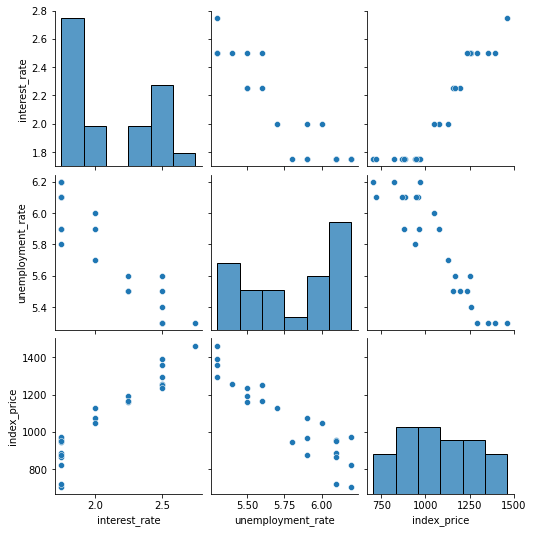

In [8]:
# Lets do some visualization
import seaborn as sns
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

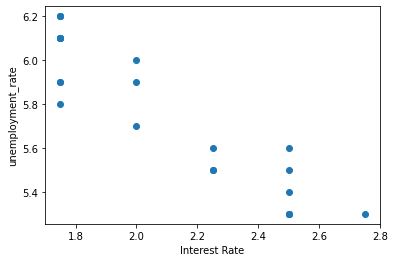

In [11]:
## Visualize the datapoint more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel("Interest Rate")
plt.ylabel("unemployment_rate")

In [16]:
## Independent and dependent feature
X=df[['interest_rate','unemployment_rate']]
y=df['index_price']
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

C:\Users\ASUS\Downloads\S\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

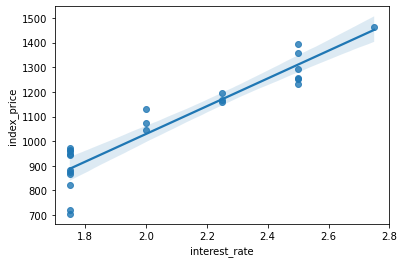

In [35]:
sns.regplot(df['interest_rate'],df['index_price'])

C:\Users\ASUS\Downloads\S\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

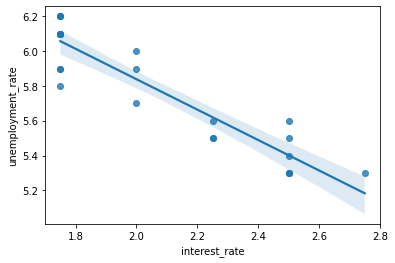

In [36]:
sns.regplot(df['interest_rate'],df['unemployment_rate'])

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [41]:
regression.fit(X_train,y_train)

LinearRegression()

In [44]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [45]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [46]:
np.mean(validation_score)

-5914.828180162389

In [47]:
# Prediction
y_pred=regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [48]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [49]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323554
76.11677139574813


In [52]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score


0.8278978091457142

In [53]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.713163015242857

In [54]:
## Assumption

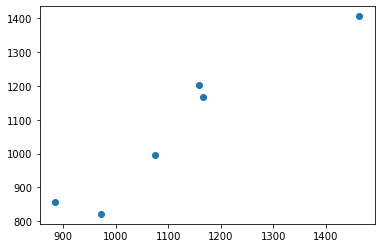

In [55]:
plt.scatter(y_test,y_pred)

In [57]:
residual=y_test-y_pred
residual

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

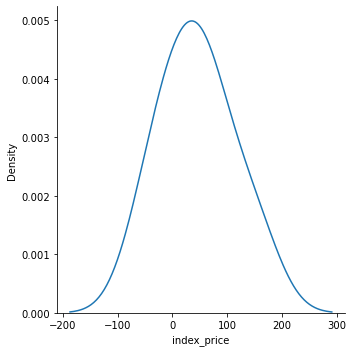

In [60]:
sns.displot(residual,kind='kde')

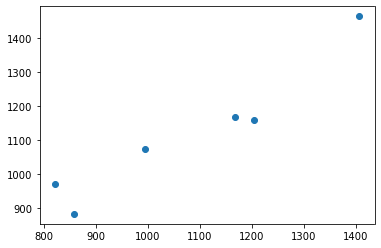

In [61]:
plt.scatter(y_pred,y_test)


In [62]:
## OLS Linear Regression
import statsmodels.api as sm

In [63]:
model=sm.OLS(y_train,X_train).fit()

In [64]:
prediction=model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [65]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 06 Aug 2024   Prob (F-statistic):                       0.754
Time:                        09:36:28   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\ASUS\Downloads\S\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [72]:
regression.predict(scaler.transform([[2.7,5.3]]))

array([675.61793164])

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

LinearRegression(n_jobs=-1)

Weigt: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443


ValueError: x and y must be the same size

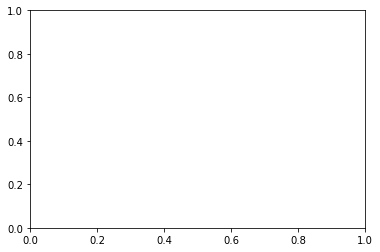